# Logistic Regression
Using logistic regression we can predict a class using some features. In this project I will be using `height` and `weight` as my features to predict if a mouse is obese or not obese (this is not real mice height and weight data). The idea of this is to see of we can predict a class given some height and weight or to see if these features even have any correlation to the class. In this notebook I will show some of my steps that I did in this project and lastly evaluate my model.
### Table of Contents
1. Data Acquisition
2. Data cleaning
3. Data visualization
4. Modeling 
5. Model evaluation 

In [378]:
import numpy as np 
import math
import pandas as pd 

%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style
from sklearn.metrics import classification_report
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression


## 1. Data aquasition
I have the data in a csv file that I downloaded previously from kaggle which you can get <a href="https://www.kaggle.com/mustafaali96/weight-height">here.</a> 

In [379]:
data = pd.read_csv("mice", names=["type", "height", "weight"])

In [380]:
data

,type,height,weight
5640,Not Obsese,66.766157,152.944405
8220,Not Obsese,63.881197,137.170886
2415,Obese,68.720243,182.455923
7442,Not Obsese,62.834020,132.169244
3182,Obese,70.962617,195.017206
...,...,...,...
2866,Obese,68.932069,187.626609
4579,Obese,64.746174,176.948433
4056,Obese,69.741240,206.636440
7843,Not Obsese,62.536789,128.357712


## 2. Data Cleaning/Exploration
Here I select my two variables of `height` and `weight` that I'll be using to predict a class. I also normalized (made it a value between 1 and 0) the type column so it we can use it. This will be useful for our model later on as well as graphing and visualize. When we normalize the `type` column, two new columns are created so we drop one of them.

In [381]:
x_1 = data['weight']
x_2 = data['weight']

In [382]:
data = pd.get_dummies(data, columns=['type'])

In [383]:
data

,height,weight,type_Not Obsese,type_Obese
5640,66.766157,152.944405,1,0
8220,63.881197,137.170886,1,0
2415,68.720243,182.455923,0,1
7442,62.834020,132.169244,1,0
3182,70.962617,195.017206,0,1
...,...,...,...,...
2866,68.932069,187.626609,0,1
4579,64.746174,176.948433,0,1
4056,69.741240,206.636440,0,1
7843,62.536789,128.357712,1,0


In [384]:
# Drop not obsese column because we already have column obese which reoresents the same thing
data.drop(columns=['type_Not Obsese'])

,height,weight,type_Obese
5640,66.766157,152.944405,0
8220,63.881197,137.170886,0
2415,68.720243,182.455923,1
7442,62.834020,132.169244,0
3182,70.962617,195.017206,1
...,...,...,...
2866,68.932069,187.626609,1
4579,64.746174,176.948433,1
4056,69.741240,206.636440,1
7843,62.536789,128.357712,0


## 3. Data Visualization
Here I did some basic visusalizations to see the relationship between height and weight. I also plot how the data looks when zoomed in on values between 1 and 0 to see where each data poing will align in the class.

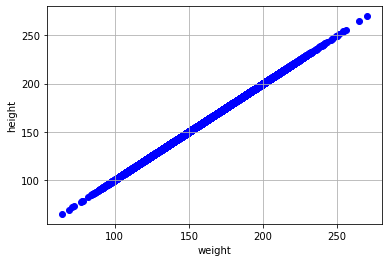

In [385]:
# plot the relationship between height and weight
%matplotlib inline 
plt.scatter(x_1, x_2, color='b')
plt.xlabel('weight')
plt.ylabel('height')
plt.grid(True)
plt.show();

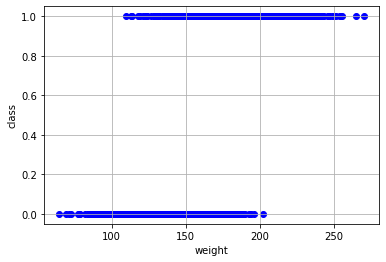

In [386]:
%matplotlib inline 
plt.scatter(x_1, data['type_Obese'], color='b')
plt.xlabel('weight')
plt.ylabel('class')
plt.grid(True)
plt.show();

In [387]:
# this is what we will be trying to predict
y = data['type_Obese']

### 4. Modeling
I used logistic regression as my model. Logistic regression is used for predicting the class of something as I explained earlier. I used `model.predict_proba()` because I wanted to get the probability of a weight beloning to a class, rather then using `model.predict()` which would give me the class it belongs to. The reason I wanted the probablities was so that I could later graph the curve of the function.

In [388]:
model = LogisticRegression()

In [389]:
X = x_1.values.reshape(-1,1)
# X= X.reshape((8000,2))
# X = X.reshape((8000, 2))

In [390]:
model.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [391]:
# get probablilites of of it belonging to a class
model.predict_proba(X)

array([[0.74681553, 0.25318447],
       [0.96136618, 0.03863382],
       [0.05175168, 0.94824832],
       ...,
       [0.00207176, 0.99792824],
       [0.98794014, 0.01205986],
       [0.9960676 , 0.0039324 ]])

In [392]:
# select the second column 
model.predict_proba(X)[:,1] 

array([0.25318447, 0.03863382, 0.94824832, ..., 0.99792824, 0.01205986,
       0.0039324 ])

In [393]:
# add probabilities to our dataframe
data["prediction"] = model.predict_proba(X)[:,1]

In [394]:
data

,height,weight,type_Not Obsese,type_Obese,prediction
5640,66.766157,152.944405,1,0,0.253184
8220,63.881197,137.170886,1,0,0.038634
2415,68.720243,182.455923,0,1,0.948248
7442,62.834020,132.169244,1,0,0.020027
3182,70.962617,195.017206,0,1,0.990111
...,...,...,...,...,...
2866,68.932069,187.626609,0,1,0.973589
4579,64.746174,176.948433,0,1,0.896930
4056,69.741240,206.636440,0,1,0.997928
7843,62.536789,128.357712,1,0,0.012060


In [395]:
pred = data['prediction']

Here is where I use the probabilites that I got from `model.predict_proba()`. I can now graph each weight (x) and the probabilty (y). This will show us the graph of the function.

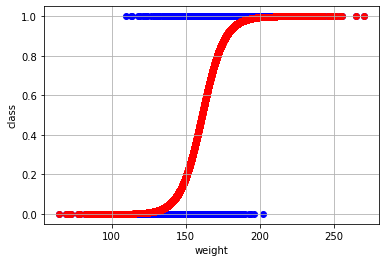

In [396]:
%matplotlib inline 
plt.scatter(data['weight'], y, color='b')
plt.scatter(data['weight'], pred, color='r')
plt.xlabel('weight')
plt.ylabel('class')
plt.grid(True)
plt.show();

In [397]:
model.predict_proba([[200]])

array([[0.00506632, 0.99493368]])

In [398]:
model.predict_proba([[130]])

array([[0.98498693, 0.01501307]])

### 5. Model evaluation
Here I evalute my model using a confusion matrix and a f1score to check its a accuracy. Both confusion martices and f1score are used to evalute classification models. The f1score gets the accuracy by counting the false postitive and true postives and then does some math to get the score. Similarly the confusion matrix shows in a matrix how many were predicted to be a class and how much of that class there is. 

In [399]:
# imports to evalute the model
from sklearn.metrics import confusion_matrix, f1_score
from sklearn.metrics import plot_confusion_matrix

In [400]:
data["pred_class"] = model.predict(X)
y_true = y
y_pred = data['pred_class']

In [401]:
# a confusion matrix
confusion_matrix(y_true, y_pred)

array([[3625,  378],
       [ 369, 3628]])

In [402]:
# the fscore
f1_score(y_true, y_pred, average='weighted')

0.9066249606074163

In [403]:
labels = ['Obese', 'Not Obese']

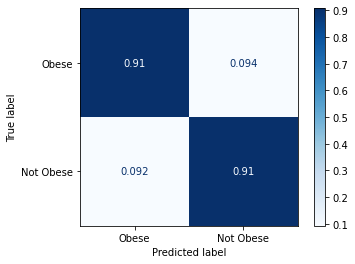

In [404]:
# normalized confusion matrix
plot_confusion_matrix(model, X, y_true, display_labels=labels, cmap=plt.cm.Blues, normalize=normalize)